# Project 2.1: Modeling the Price of Vehicles
## Part 2: Exploratory Data Analysis with Automobile Dataset

For this dataset, we will try to build a model to determine the price of a vehicle. For this lab, we will complete the data cleaning and exploratory data analysis required to build our model. Cleaning the dataset and identifying features which relate to vehicle price is critical to building a model to answer our question. A future lab will use our findings here to actually create the model. This notebook contains part 2 of this lab and is worth 6 points.

**Rubric**
- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc.
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

**This is the second part of the lab, please complete part 1 first.**

## Getting the data 
Import `pandas` and use `.read_csv()` to create your dataframe from the CSV you just cleaned. Print the first 10 rows to make sure you have the right dataframe. If you are concerned your data has not been cleaned correctly, use `auto_cleaned.csv` provided in the GitHub.

In [ ]:
import pandas as pd
df=pd.read_csv("carcsv.csv")
df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,city-L/100km,highway-L/100km,binnedhorses,fuel-type-diesel,fuel-type-gas,std,turbo,std.1,turbo.1
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,16500,11.200714,8.711667,low,False,True,True,False,True,False
1,1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,16500,12.379737,9.046731,medium,False,True,True,False,True,False
2,2,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,...,13950,9.800625,7.840500,low,False,True,True,False,True,False
3,3,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,...,17450,13.067500,10.691591,low,False,True,True,False,True,False
4,4,2,122.0,audi,two,sedan,fwd,front,99.8,0.851994,...,15250,12.379737,9.408600,low,False,True,True,False,True,False
5,5,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,...,17710,12.379737,9.408600,low,False,True,True,False,True,False
6,6,1,122.0,audi,four,wagon,fwd,front,105.8,0.925997,...,18920,12.379737,9.408600,low,False,True,True,False,True,False
7,7,1,158.0,audi,four,sedan,fwd,front,105.8,0.925997,...,23875,13.836176,11.760750,medium,False,True,False,True,False,True
8,8,2,192.0,bmw,two,sedan,rwd,front,101.2,0.849592,...,16430,10.226739,8.110862,low,False,True,True,False,True,False
9,9,0,192.0,bmw,four,sedan,rwd,front,101.2,0.849592,...,16925,10.226739,8.110862,low,False,True,True,False,True,False


## Exploratory Data Analysis

The question we want to investigate is:  **What are the main characteristics that have the most impact on the car price?**

To do so, let's look at some of our different features. 

For this lab, we will use the library  `seaborn` in addition to `matplotlib.pyplot` and `numpy`. This will allow use to make plots of the relationship between variables, and see the variability on our plots on the same graph. seaborn is built on matplotlib and the two libraries interact. Typically, we import seaborn as `sns`.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### How to choose the right visualization method?
When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable. Remember `.dtypes` from the last notebook.

In [2]:
#ok

We can calculate the correlation between variables  of type "int64" or "float64" using the pandas method `.corr()`. *This should automatically ignore non-numeric columns, but if it doesn't you can create a dataframe of only numeric columns with `df.select_dtypes(include=['int', 'float'])`*

The diagonal elements are always one; we will study correlation more precisely Pearson correlation in-depth at the end of the notebook. The basic idea is that a **correlation coefficient** is a numerical measure of the linear relationship between two variables. 1 is the strongest possible positive correlation, -1 is the strongest possible negative correlation, and 0 is no correlation.

Find the correlation between the following columns: `bore`, `stroke`, `compression-ratio`, and `horsepower`. *Hint: if you would like to select those columns, use the following syntax: `df[['bore','stroke','compression-ratio','horsepower']]`*

In [3]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

NameError: name 'df' is not defined

#### Continuous numerical variables

Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use `regplot` which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model we will build in the next lab as well. 

Let's see several examples of different linear relationships.


**Strong Linear Relationship**
Let's make the scatterplot of `engine-size` and `price`. We are going to use seaborn's `regplot()` like this:
`sns.regplot(x="engine-size", y="price", data=df)`. Use the `plt` functions we know to start the y axis at 0 and add a title and axis labels.

(0.0, 53040.11683927635)

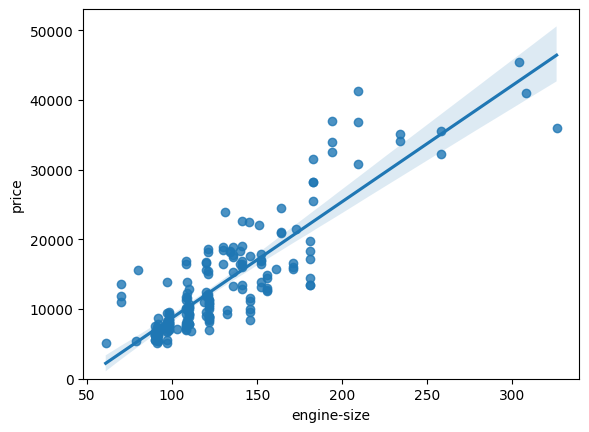

In [ ]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,None)


As the engine-size goes up, the price goes up: this indicates a **strong positive correlation** between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see that it's approximately 0.87 with `corr()`.

In [ ]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


Now, let's find the scatterplot of `highway-mpg` and `price`. Make sure start the y axis at 0 and add a title and axis labels.

(0.0, 48170.67507881701)

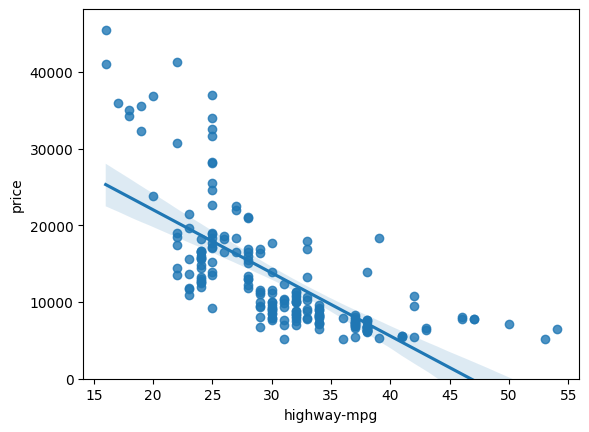

In [ ]:
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,None)

As highway-mpg goes up, the price goes down. This indicates an **strong inverse/negative correlation** between these two variables. Highway MPG could potentially be a predictor of price.

Now, look at the numerical correlation between "highway-mpg" and "price".

In [ ]:
df[["highway-mpg",'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.705115
price,-0.705115,1.000000


**Weak Linear Relationship**
Let's see if "peak-rpm" is a predictor variable of "price" by making a plot.


(0.0, 47414.1)

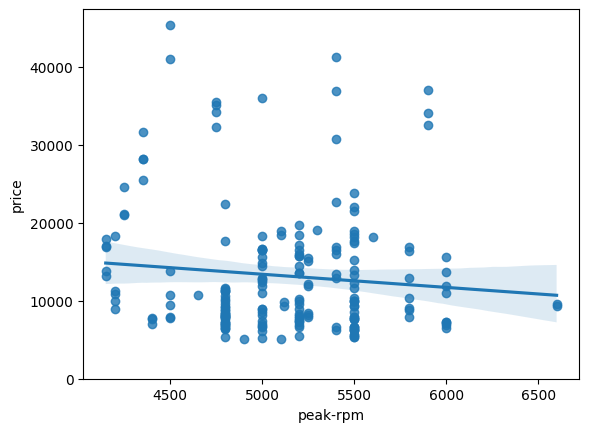

In [ ]:
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,None)

Peak RPM does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

Let's look at the numerical correlation between the variables.

In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101519
price,-0.101519,1.000000


Let's find the numerical correlation between x="stroke" and y="price".

In [ ]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.083296
price,0.083296,1.000000


Given the correlation results between "price" and "stroke", do we expect a linear relationship?
We verify your results using the function `regplot()`.

(0.0, 47414.1)

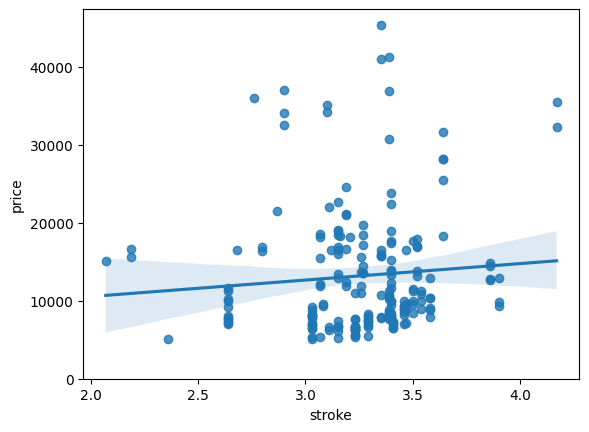

In [ ]:
sns.regplot(x='stroke',y='price',data=df)
plt.ylim(0,None)

#### Categorical variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

We are going to use seaborn's `boxplot()` like this: `sns.boxplot(x=..., y=..., data=df)`.

Let's look at the relationship between "body-style" and "price".


<Axes: xlabel='body-style', ylabel='price'>

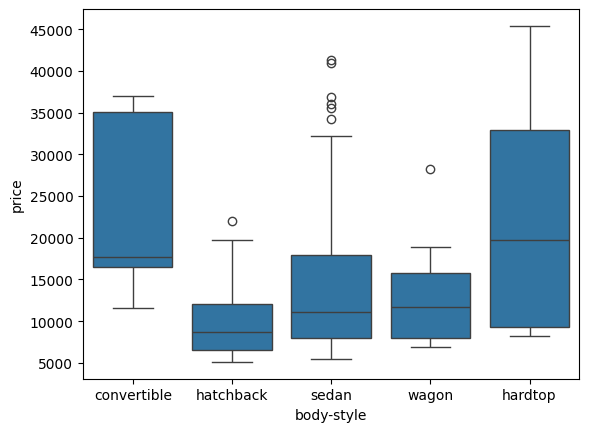

In [ ]:
sns.boxplot(x='body-style',y='price',data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. 


What about another column? Let's examine engine "engine-location" and "price" with another boxplot.

<Axes: xlabel='engine-location', ylabel='price'>

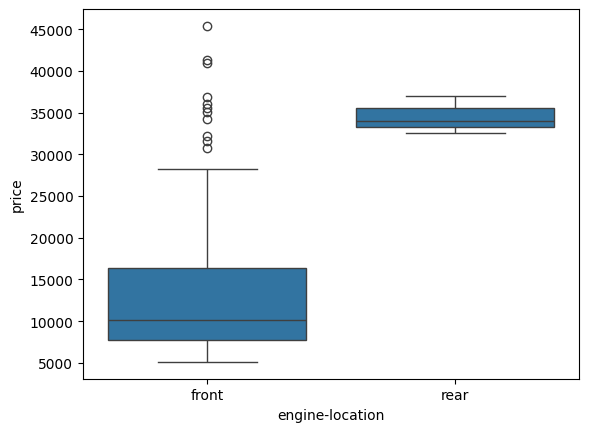

In [ ]:
sns.boxplot(x='engine-location',y='price',data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's do the same for "drive-wheels" and "price".


<Axes: xlabel='drive-wheels', ylabel='price'>

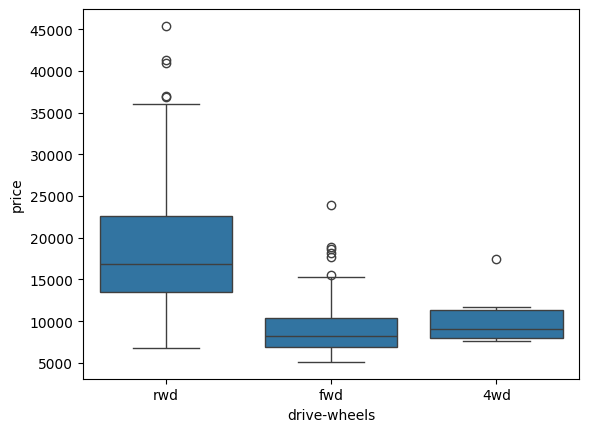

In [ ]:
sns.boxplot(x='drive-wheels',y='price',data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


#### Descriptive statistical analysis
Let's first take a look at the variables by utilizing a description method.

The `describe()` function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:
- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value

Use `describe()` in our dataframe here.

In [ ]:
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,0.830000,122.000000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,3.330000,3.259847,10.170100,103.358586,5118.181818,25.200000,30.705000,13205.690000,9.947006,8.049020
std,57.879185,1.248557,32.076542,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,0.268562,0.314177,4.014163,37.455470,479.240110,6.432487,6.827227,7966.982558,2.541739,1.846452
min,0.000000,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.800306,4.355833
25%,49.750000,0.000000,100.250000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,3.150000,3.117500,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.840500,6.918088
50%,99.500000,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5159.090909,24.000000,30.000000,10270.000000,9.800625,7.840500
75%,149.250000,2.000000,138.250000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000,12.379737,9.408600
max,199.000000,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.093462,14.700938


The default setting of `describe()` skips variables of type `object`. We can apply the function on the variables of type `object` by including them specifically with `describe(include=['object'])`.

In [ ]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,binnedhorses
count,200,198,200,200,200,200,200,200,200
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,113,94,118,197,145,156,91,152


#### Value counts
Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the `value_counts()` function on the column "engine-location". Don’t forget the function `value_counts()` only works on pandas series, not pandas dataframes. As a result, we only include one bracket `df['engine-location']` not two brackets `df[['engine-location']]`.

In [ ]:
df["engine-location"].value_counts()

engine-location
front    197
rear       3
Name: count, dtype: int64

We can convert the series to a dataframe with the function `.to_frame()`. Create the dataframe "engine_location_counts" to store the `value_counts()` of "engine-location".

In [ ]:
df['engine-location'].value_counts().to_frame()

,count
engine-location,
front,197
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


#### Basics of grouping

The `groupby()` method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". Before we do, see that there are 3 different categories of drive wheels with the function `unique()`.

In [ ]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels' and 'price', then assign it to the dataframe "df_1". Then use the function `groupby()` like this `.groupby(['drive-wheels'],as_index=False)` to group by 'drive-wheels' and save our grouping in the variable `gp`. To get the mean value by group, we can use the function `.mean()` on our groupings.

In [ ]:
df_1=pd.concat([df["drive-wheels"],df["price"]], axis=1)
gp=df_1.groupby(['drive-wheels'], as_index=False)
gp.mean()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19842.243243


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. Create the dataframe `df_2` with the three columns we need, group by both 'drive-wheels' and 'body-style', and saving your groupings to `gp2`. Then find the mean of the groupings in `gp2` and save the dataframe to `gp2_m`.

In [ ]:
df_2=pd.concat([df["drive-wheels"],df["body-style"],df["price"]],axis=1)
gp2=df_2.groupby(["drive-wheels","body-style"], as_index=False)
gp2_m=pd.DataFrame(gp2.mean())
gp2_m

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method `pivot()` to create a pivot table from the groups.

In this case, we will leave the 'drive-wheels' variable as the rows of the table, and pivot 'body-style' to become the columns of the table by using the function `.pivot(index='drive-wheels',columns='body-style')` on our dataframe of means `gp2_m`. Save your pivot table in a dataframe `grouped_pivot`.

In [ ]:
grouped_pivot=pd.DataFrame(gp2_m.pivot(index='drive-wheels',columns='body-style'))
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. We can use the function `.fillna(...)` with the parameter 0 on the pivot table to fill in the values.

In [ ]:
grouped_pivot=grouped_pivot.fillna(0)
display(grouped_pivot)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

**Great!** Now we can see the average price of a vechicle based on its drive-wheels and body-style

#### Visualize - Drive Wheels and Body Style vs. Price
Let's use a heat map to visualize the relationship between Drive Wheels and Body Style vs Price.

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

These heatmap plots are cool but can be difficult to set up since the default labels aren't very helpful. So here is some code to make your first heatmap plot.
```
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)

plt.title("Heatmap of Vehicle Price by Drive Wheel and Body Style")
plt.xlabel("body style")
plt.ylabel("drive wheels")
plt.show()
```



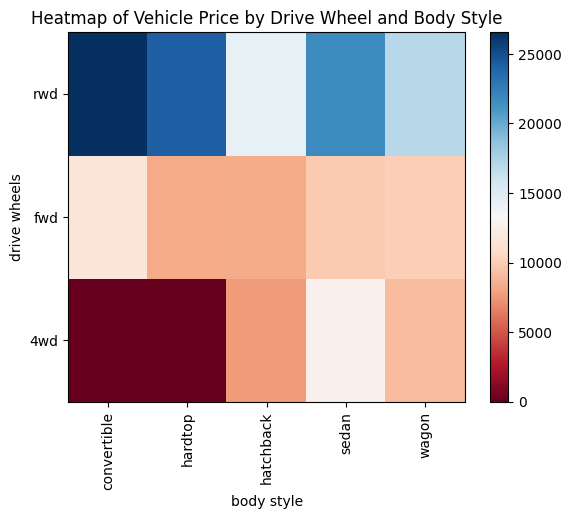

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)

plt.title("Heatmap of Vehicle Price by Drive Wheel and Body Style")
plt.xlabel("body style")
plt.ylabel("drive wheels")
plt.show()

The main question we want to answer in this lab is, "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. In other words: how is the car price dependent on this variable?

#### Correlation
**Correlation**: a measure of the extent of interdependence between variables.
**Causation**: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

**Pearson Correlation**

There are multiple ways to quantify the relationship between two random variables, but the most relevant to us in this course will be the Pearson correlation coefficient. The *Pearson correlation coefficient* measures the linear dependence between two variables X and Y. 

The resulting coefficient is a value between -1 and 1 inclusive, where:
- **1**: Perfect positive linear correlation.
- **0**: No linear correlation, the two variables most likely do not affect each other.
- **-1**: Perfect negative linear correlation.

Pearson Correlation is the default method of the function `corr()`. Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables. 

Let's run it again here. 

In [ ]:
df.select_dtypes(include=['int', 'float']).corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
Unnamed: 0,1.000000,-0.150130,-0.242903,0.112632,0.159326,0.036964,0.238730,0.065178,-0.047468,0.251250,-0.181350,0.142885,-0.020984,-0.199372,0.022527,0.015801,-0.118787,-0.095680,-0.075844
symboling,-0.150130,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145667,0.008244,-0.181073,0.074594,0.284011,-0.030158,0.041248,-0.083327,0.062423,-0.033159
normalized-losses,-0.242903,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029867,0.055759,-0.114738,0.217323,0.239580,-0.225255,-0.182011,0.133999,0.238712,0.181247
wheel-base,0.112632,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501534,0.144675,0.249689,0.375689,-0.364971,-0.480029,-0.552211,0.589147,0.484047,0.584953
length,0.159326,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610817,0.120888,0.159203,0.580515,-0.286754,-0.667658,-0.700186,0.691044,0.659174,0.708466
width,0.036964,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548478,0.182855,0.189008,0.617062,-0.247388,-0.638155,-0.684700,0.752795,0.677111,0.739845
height,0.238730,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187794,-0.081273,0.259526,-0.085763,-0.315756,-0.057087,-0.111568,0.137284,0.008923,0.088903
curb-weight,0.065178,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644532,0.168642,0.156444,0.758089,-0.279411,-0.750390,-0.795515,0.834420,0.785868,0.837217
engine-size,-0.047468,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572786,0.208004,0.029005,0.822669,-0.256702,-0.651002,-0.679877,0.872337,0.745337,0.783593
bore,0.251250,-0.145667,-0.029867,0.501534,0.610817,0.548478,0.187794,0.644532,0.572786,1.000000,-0.051087,0.002021,0.566736,-0.267010,-0.581365,-0.590753,0.543431,0.554069,0.558759


This value can be helpful for assessing how related two variables are. But, sometimes we would like to know the significant of the correlation estimate. We might want to know what the probability is that the relationship between the two is *statistically significant*. 

**P-value**

What is this p-value? The p-value is the probability value that the correlation between these two variables is statistically significant. 

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. Regardless of what correlation we calculate(weak, strong, etc.) we need to know how likely it is that correlation is accurate. High correlation coefficients don't necessarily guarantee high p-values. You could have a relationship with a low correlation coefficient with a high p-value and be pretty confident those two variables are not good predictors of one another. Or, you could have a relationship with a strong correlation coefficient and a low p-value and be less confident a relationship actually exists.


Since we are using a significance level of 0.05, if
- the p-value is $< 0.001$: we say there is strong evidence that the correlation is significant
- the p-value is $< 0.05$: there is moderate evidence that the correlation is significant
- the p-value is $< 0.1$: there is weak evidence that the correlation is significant
- the p-value is $> 0.1$: there is no evidence that the correlation is significant

**How do we actually use these two things?**

For any two random variables, we can compute their Pearson coerrelation coefficient and the associated p-value. The Pearson correlation coefficient will tell us what relationship the two variables may have(strong positive linear, strong negative linear, weak linear, etc). Then based on the p-value, we can make a determiniation about how statistically significant that relationship is. 

Your conclusions will be in a similar form to: "Since the p-value is less than or greater than ______, the correlation between variable 1 and variable 2 is ____________(from bullets above), and the linear relationship is _________ (weak, strong, somewhat strong etc./positive, negative, neither) with a correlation coefficient of ______." At the end of our analysis, we will be able to make some determinations about which features we think are significant and would be worth including in our model.

Let's import the `stats` module from the `scipy` library. If `scipy` is not installed, you will want to use pip to add it to your environment. 

In [ ]:
from scipy import stats
df

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,city-L/100km,highway-L/100km,binnedhorses,fuel-type-diesel,fuel-type-gas,std,turbo,std.1,turbo.1
0,0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,16500,11.200714,8.711667,low,False,True,True,False,True,False
1,1,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,16500,12.379737,9.046731,medium,False,True,True,False,True,False
2,2,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,...,13950,9.800625,7.840500,low,False,True,True,False,True,False
3,3,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,...,17450,13.067500,10.691591,low,False,True,True,False,True,False
4,4,2,122.0,audi,two,sedan,fwd,front,99.8,0.851994,...,15250,12.379737,9.408600,low,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,16845,10.226739,8.400536,low,False,True,True,False,True,False
196,196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,19045,12.379737,9.408600,medium,False,True,False,True,False,True
197,197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,21485,13.067500,10.226739,medium,False,True,True,False,True,False
198,198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,...,22470,9.046731,8.711667,low,True,False,False,True,False,True


#### Wheel-Base vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'wheel-base' and 'price'. Using `stats`, we can get both by with the line: `pearson_coef, p_value = stats.pearsonr(x_column, y_column)`.


In [ ]:
r_value,p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(r_value,p_value)

0.5891470005448702 4.457019502050249e-20


**Conclusion**

#### Horsepower vs. Price
Let's calculate the  Pearson correlation coefficient and p-value of 'horsepower' and 'price'.


In [ ]:
r_value,p_value = stats.pearsonr(df['horsepower'], df['price'])
print(r_value,p_value)

0.8097357390985243 1.0089009233333114e-47


**Conclusion**

#### Length vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'length' and 'price'.


In [ ]:
r_value,p_value = stats.pearsonr(df['length'], df['price'])
print(r_value,p_value)

0.6910440897821905 9.960963222348405e-30


**Conclusion**

#### Width vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'width' and 'price'.


In [ ]:
r_value,p_value = stats.pearsonr(df['width'], df['price'])
print(r_value,p_value)

0.7527948631832612 8.256714148308014e-38


**Conclusion**

#### Curb-weight vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'curb-weigth' and 'price'.


In [ ]:
r_value,p_value = stats.pearsonr(df['curb-weight'], df['price'])
print(r_value,p_value)

0.8344204348498462 3.969977536021844e-53


**Conclusion**

#### Engine-size vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'engine-size' and 'price'.


In [ ]:
r_value,p_value = stats.pearsonr(df['engine-size'], df['price'])
print(r_value,p_value)

0.8723367498521142 1.897717146656209e-63


**Conclusion**

#### Bore vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'bore' and 'price'.


In [ ]:
r_value,p_value = stats.pearsonr(df['bore'], df['price'])
print(r_value,p_value)

0.5434310033088077 9.209749630850503e-17


**Conclusion**

#### City MPG vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'city-mpg' and 'price'.

In [ ]:
r_value,p_value = stats.pearsonr(df['city-mpg'], df['price'])
print(r_value,p_value)

-0.6871861020862687 2.7292565684789384e-29


**Conclusion**

#### Highway MPG vs. Price
Let's calculate the Pearson correlation coefficient and p-value of 'highway-mpg' and 'price'.


In [ ]:
r_value,p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(r_value,p_value)

-0.7051147088046403 2.197326053158349e-31


**Conclusion**

### ANOVA: Analysis of Variance
The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:
- **F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
- **P-value<**:  P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

#### Drive Wheels
From our boxplots earlier, we still aren't sure whether drive wheel type is a good predictor of vehicle price. This is a great time for us to use ANOVA!

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

To see if different types of 'drive-wheels' impact 'price', we group the data. If we get the 'drive-wheels' and 'price' columns from the dataframe and then use `.groupby(['drive-wheels])`, it will return a grouping of our data by 'drive-wheel'. Let's save it as a variable `gp_dw`.

In [ ]:
gp_dw=df[['drive-wheels','price']].groupby(['drive-wheels'])

Then we can get the prive value for a specific "drive-wheel" category with the `get_group()` method. If we wanted to know the 'price' of all 4wd vehicles we could  use `.get_group('4wd')` on `gp_dw`.

In [ ]:
gp_dw.get_group('fwd')

/tmp/ipykernel_5121/1668181528.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  gp_dw.get_group('fwd')


,drive-wheels,price
2,fwd,13950
4,fwd,15250
5,fwd,17710
6,fwd,18920
7,fwd,23875
...,...,...
184,fwd,11595
185,fwd,9980
186,fwd,13295
187,fwd,13845


Let's use ANOVA to see if there is a relationship between 'price' and 'fwd', 'rwd', or '4wd'. We can use the `stats` function `f_oneway()` to obtain the **F-test score** and **p-value**. To use it `f_val, p_val = stats.f_oneway(...)` with each group we want to analyze passed in as parameters(by getting the `['price']` column of each row in the group using the `get_group()` function from the last cell). 

In [ ]:
fwd = gp_dw.get_group("fwd")['price']
rwd = gp_dw.get_group("rwd")["price"]
wd4 = gp_dw.get_group("4wd")["price"]
f_val,p_val= stats.f_oneway(fwd,rwd,wd4)
print(f_val,p_val)

68.49603532807176 2.6116313994533863e-23


/tmp/ipykernel_5121/1332608034.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  fwd = gp_dw.get_group("fwd")['price']
/tmp/ipykernel_5121/1332608034.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  rwd = gp_dw.get_group("rwd")["price"]
/tmp/ipykernel_5121/1332608034.py:3: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  wd4 = gp_dw.get_group("4wd")["price"]


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

#### fwd and rwd
Run the same test with only 'fwd' and 'rwd'

In [ ]:
f_val,P_val=stats.f_oneway(fwd,rwd)
print(f_val, p_val)

131.59324661179534 2.6116313994533863e-23



#### 4wd and rwd

In [ ]:
f_val,P_val=stats.f_oneway(wd4,rwd)
print(f_val, p_val)

8.67069478113451 2.6116313994533863e-23


#### 4wd and fwd


In [ ]:
f_val,P_val=stats.f_oneway(wd4,fwd)
print(f_val, p_val)

0.665465750252303 2.6116313994533863e-23


We notice that ANOVA for the categories `4wd` and `fwd` yields a high p-value $> 0.1$, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.


## Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.



## Export your file
To move to the model building of next lab, we need to save our dataframe in a new file. Use the function `df.to_csv(file_name)` to save your dataframe to a new csv.


In [ ]:
df.to_csv("automobile3.csv")